In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor

from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, \
    plot_confusion_matrix,classification_report, confusion_matrix, precision_score, \
    recall_score, f1_score


In [185]:
#mass = pd.read_csv('../data/03_mass_no_country.csv')

In [186]:
X = pd.read_csv('../data/x_sample.csv')

In [187]:
X.head()

,protestnumber,protesterviolence,pop_total,pop_density,prosperity_2020,region_Africa,region_Asia,region_Central America,region_Europe,region_MENA,...,protester_id_type_victims_families,protester_id_type_women,protester_id_type_workers_unions,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions
0,1,0.0,73030.879,244.930,56.900724,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1.0,3862.998,71.024,44.029639,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0.0,927403.866,311.922,53.640353,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,14,0.0,4058.131,58.907,80.176044,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


#### Load model from pickle file

In [188]:
# load the model from disk
model_file = '../models/01_multi_label_forest.pickle'
loaded_model = pickle.load(open(model_file, 'rb'))




In [189]:
loaded_model

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=30,
                                                       max_leaf_nodes=100,
                                                       min_impurity_decrease=0,
                                                       min_samples_leaf=5,
                                                       min_samples_split=4,
                                                       n_estimators=50))

In [190]:
result = loaded_model.predict(X)

print(result)

[[0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]]


In [191]:
predictions = pd.DataFrame([], columns=['arrests', 'accomodation', 'beatings',
       'crowddispersal', 'ignore', 'killings', 'shootings'])
predictions

,arrests,accomodation,beatings,crowddispersal,ignore,killings,shootings


### Create input records for a few protests in the United States.

#### March for Our Lives Protest
This took place in March, 2018.

The [March for Our Lives (MFOL)](https://en.wikipedia.org/wiki/March_for_Our_Lives) is a student-led demonstration in support of gun control legislation.

First, delete all rows from X that were the four rows of test data.

In [192]:
X.drop([0,1,2,3], inplace=True)  # drop the four rows of old data.
X

,protestnumber,protesterviolence,pop_total,pop_density,prosperity_2020,region_Africa,region_Asia,region_Central America,region_Europe,region_MENA,...,protester_id_type_victims_families,protester_id_type_women,protester_id_type_workers_unions,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions


Append our new single row to feed into the model.

In [193]:
# March, 2018 - March for Our Lives Protest
# Create a dictionary that contains a value for each of the 40 input features

new_protest = {
    'protestnumber': 4,  # Random guess
    'protesterviolence': 0,
    'pop_total': 327096.263,  # Taken from WPP2019_TotalPopulationBySex.csv
    'pop_density':35.76,
    'prosperity_2020': 77.5,  # Taken from Legatum_Prosperity_Index_Full_2020_Data_Set Excel file - Score from 2007
    'region_Africa': 0,
    'region_Asia': 0,
    'region_Central America': 0,
    'region_Europe': 0,
    'region_MENA': 0,
    'region_North America': 1,
    'region_Oceania': 0,
    'region_South America': 0,
    'protest_size_category_1,000-4,999': 0,  
    'protest_size_category_10,000-100,000': 0,   
    'protest_size_category_100-999': 0,
    'protest_size_category_5,000-9,999': 0,
    'protest_size_category_50-99':0 ,
    'protest_size_category_Less than 50': 0,
    'protest_size_category_Over 100,000': 1,  #Protest nation-wide, over 1 million
    'protester_id_type_civil_human_rights': 0,
    'protester_id_type_ethnic_group': 0,
    'protester_id_type_locals_residents': 0,
    'protester_id_type_pensioners_retirees': 0,
    'protester_id_type_political_group': 0,
    'protester_id_type_prisoners': 0,
    'protester_id_type_protestors_generic': 0,
    'protester_id_type_religious_group': 0,
    'protester_id_type_soldiers_veterans': 0,
    'protester_id_type_students_youth':1,
    'protester_id_type_victims_families': 0,
    'protester_id_type_women':0,
    'protester_id_type_workers_unions': 0,
    'labor_wage_dispute': 0,
    'land_farm_issue': 0,
    'police_brutality':0,
    'political_behavior_process': 1,   # This seems to match gun control legislation the best
    'price increases_tax_policy': 0,
    'removal_of_politician':0,
    'social_restrictions':0
}
        
#append row to the dataframe
X = X.append(new_protest, ignore_index=True)
X

,protestnumber,protesterviolence,pop_total,pop_density,prosperity_2020,region_Africa,region_Asia,region_Central America,region_Europe,region_MENA,...,protester_id_type_victims_families,protester_id_type_women,protester_id_type_workers_unions,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions
0,4.0,0.0,327096.263,35.76,77.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Run the model and predict the state response.

In [194]:
predicted_state_response = loaded_model.predict(X)

predictions.loc["2018 March For Our Lives"] = predicted_state_response[0]
predictions

,arrests,accomodation,beatings,crowddispersal,ignore,killings,shootings
2018 March For Our Lives,0,0,0,0,1,0,0


Clear X for next protest

In [205]:
X.drop([1], inplace=True)  
X

,protestnumber,protesterviolence,pop_total,pop_density,prosperity_2020,region_Africa,region_Asia,region_Central America,region_Europe,region_MENA,...,protester_id_type_victims_families,protester_id_type_women,protester_id_type_workers_unions,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions


#### 1999 Seattle World Trade Organization protest

[1999 Seattle World Trade Organization protest](https://en.wikipedia.org/wiki/1999_Seattle_WTO_protests)



In [206]:
# 1999 Seattle
# Create a dictionary that contains a value for each of the 40 input features

new_protest = {
    'protestnumber': 1,
    'protesterviolence': 1,
    'pop_total': 278548.148,  # Taken from WPP2019_TotalPopulationBySex.csv
    'pop_density':30.45,
    'prosperity_2020': 77.5,  # Taken from Legatum_Prosperity_Index_Full_2020_Data_Set Excel file - Score from 2007
    'region_Africa': 0,
    'region_Asia': 0,
    'region_Central America': 0,
    'region_Europe': 0,
    'region_MENA': 0,
    'region_North America': 1,
    'region_Oceania': 0,
    'region_South America': 0,
    'protest_size_category_1,000-4,999': 0,
    'protest_size_category_10,000-100,000': 1,   #Protest size around 50,000 or more
    'protest_size_category_100-999': 0,
    'protest_size_category_5,000-9,999': 0,
    'protest_size_category_50-99':0 ,
    'protest_size_category_Less than 50': 0,
    'protest_size_category_Over 100,000': 0,
    'protester_id_type_civil_human_rights': 0,
    'protester_id_type_ethnic_group': 0,
    'protester_id_type_locals_residents': 0,
    'protester_id_type_pensioners_retirees': 0,
    'protester_id_type_political_group': 0,
    'protester_id_type_prisoners': 0,
    'protester_id_type_protestors_generic': 0,
    'protester_id_type_religious_group': 0,
    'protester_id_type_soldiers_veterans': 0,
    'protester_id_type_students_youth':0,
    'protester_id_type_victims_families': 0,
    'protester_id_type_women':0,
    'protester_id_type_workers_unions': 1,
    'labor_wage_dispute': 1,
    'land_farm_issue': 0,
    'police_brutality':0,
    'political_behavior_process': 1,
    'price increases_tax_policy': 1,
    'removal_of_politician':0,
    'social_restrictions':1
}
        
#append row to the dataframe
X = X.append(new_protest, ignore_index=True)
X

,protestnumber,protesterviolence,pop_total,pop_density,prosperity_2020,region_Africa,region_Asia,region_Central America,region_Europe,region_MENA,...,protester_id_type_victims_families,protester_id_type_women,protester_id_type_workers_unions,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions
0,1.0,1.0,278548.148,30.45,77.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [207]:
predicted_state_response = loaded_model.predict(X)

predictions.loc["1999 Seattle WTO Protest"] = predicted_state_response[0]
predictions

,arrests,accomodation,beatings,crowddispersal,ignore,killings,shootings
2018 March For Our Lives,0,0,0,0,1,0,0
1999 Seattle WTO Protest,0,0,0,0,0,0,0


Clear X for next protest

In [208]:
X.drop([0], inplace=True)  
X

,protestnumber,protesterviolence,pop_total,pop_density,prosperity_2020,region_Africa,region_Asia,region_Central America,region_Europe,region_MENA,...,protester_id_type_victims_families,protester_id_type_women,protester_id_type_workers_unions,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions


### Create protest for [Jan 6 storming of the U.S. Capitol](https://en.wikipedia.org/wiki/2021_storming_of_the_United_States_Capitol) in Washington D.C.

In [209]:
# 2021 D.C. Jan 6

# Create a dictionary that contains a value for each of the 40 input features

new_protest = {
    'protestnumber': 1,  # First protest of the year
    'protesterviolence': 1,
    'pop_total': 332915.074,  # Taken from WPP2019_TotalPopulationBySex.csv
    'pop_density':36.40,
    'prosperity_2020': 77.5,  # Taken from Legatum_Prosperity_Index_Full_2020_Data_Set Excel file - Score from 2007
    'region_Africa': 0,
    'region_Asia': 0,
    'region_Central America': 0,
    'region_Europe': 0,
    'region_MENA': 0,
    'region_North America': 1,
    'region_Oceania': 0,
    'region_South America': 0,
    'protest_size_category_1,000-4,999': 1,  #Protest size in the thousands
    'protest_size_category_10,000-100,000': 0,   
    'protest_size_category_100-999': 0,
    'protest_size_category_5,000-9,999': 0,
    'protest_size_category_50-99':0 ,
    'protest_size_category_Less than 50': 0,
    'protest_size_category_Over 100,000': 0,
    'protester_id_type_civil_human_rights': 0,
    'protester_id_type_ethnic_group': 0,
    'protester_id_type_locals_residents': 0,
    'protester_id_type_pensioners_retirees': 0,
    'protester_id_type_political_group': 1,
    'protester_id_type_prisoners': 0,
    'protester_id_type_protestors_generic': 0,
    'protester_id_type_religious_group': 0,
    'protester_id_type_soldiers_veterans': 0,
    'protester_id_type_students_youth':0,
    'protester_id_type_victims_families': 0,
    'protester_id_type_women':0,
    'protester_id_type_workers_unions': 0,
    'labor_wage_dispute': 0,
    'land_farm_issue': 0,
    'police_brutality':0,
    'political_behavior_process': 1,
    'price increases_tax_policy': 0,
    'removal_of_politician':1,
    'social_restrictions':0
}
        
#append row to the dataframe
X = X.append(new_protest, ignore_index=True)
X

,protestnumber,protesterviolence,pop_total,pop_density,prosperity_2020,region_Africa,region_Asia,region_Central America,region_Europe,region_MENA,...,protester_id_type_victims_families,protester_id_type_women,protester_id_type_workers_unions,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions
0,1.0,1.0,332915.074,36.4,77.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [210]:
predicted_state_response = loaded_model.predict(X)

predictions.loc["2021 D.C. Riot"] = predicted_state_response[0]
predictions

Clear X for next protest

In [181]:
X.drop([0], inplace=True)  
X

,protestnumber,protesterviolence,pop_total,pop_density,prosperity_2020,region_Africa,region_Asia,region_Central America,region_Europe,region_MENA,...,protester_id_type_victims_families,protester_id_type_women,protester_id_type_workers_unions,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions


In [211]:
predictions

,arrests,accomodation,beatings,crowddispersal,ignore,killings,shootings
2018 March For Our Lives,0,0,0,0,1,0,0
1999 Seattle WTO Protest,0,0,0,0,0,0,0
2021 D.C. Riot,0,0,0,0,0,0,0


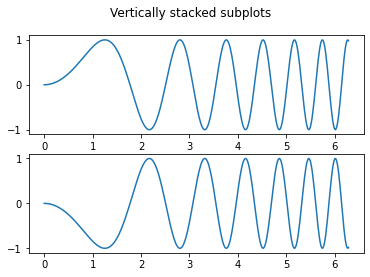

In [183]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y);